In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import tensorflow as tf

In [58]:
df = pd.read_csv('/content/ACB.VN-BaoCao.csv')

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,8533.238281,8619.142578,8447.333008,8590.507813,8254.484375,5164405.0
1,2019-03-04,8590.507813,8733.682617,8561.873047,8705.047852,8364.543945,10898750.0
2,2019-03-05,8705.047852,8790.953125,8619.142578,8676.413086,8337.029297,8611453.0
3,2019-03-06,8647.778320,8705.047852,8590.507813,8676.413086,8337.029297,11100248.0
4,2019-03-07,8705.047852,8790.953125,8676.413086,8733.682617,8392.058594,11530669.0


In [59]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Train test 8:2

In [27]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [28]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [30]:
# Define the model
def build_model(input_dim):
    model = Sequential()
    # Using a smaller standard deviation for the normal initializer
    model.add(Dense(1, input_dim=input_dim, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), activation='linear'))
    # Increased learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = build_model(input_dim=1)
model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=5)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())

# Output the model summary to check the structure
print('---------Model summary----------')
model.summary()
model.get_weights()

9/9 [==============================] - 0s 2ms/step
Predictions: [19549.656 19568.256 19586.855 19605.455 19624.055 19642.654 19661.256
 19679.855 19698.455 19717.055 19735.654 19754.254 19772.855 19791.455
 19810.055 19828.654 19847.254 19865.855 19884.455 19903.055 19921.654
 19940.254 19958.854 19977.455 19996.055 20014.654 20033.254 20051.854
 20070.453 20089.055 20107.654 20126.254 20144.854 20163.453 20182.053
 20200.654 20219.254 20237.854 20256.453 20275.053 20293.654 20312.254
 20330.854 20349.453 20368.053 20386.652 20405.254 20423.854 20442.453
 20461.053 20479.652 20498.252 20516.854 20535.453 20554.053 20572.652
 20591.252 20609.854 20628.453 20647.053 20665.652 20684.252 20702.852
 20721.453 20740.053 20758.652 20777.252 20795.852 20814.451 20833.053
 20851.652 20870.252 20888.852 20907.451 20926.05  20944.652 20963.252
 20981.852 21000.451 21019.05  21037.652 21056.252 21074.852 21093.451
 21112.05  21130.65  21149.252 21167.852 21186.451 21205.05  21223.65
 21242.25  212

[array([[18.59995]], dtype=float32), array([19.706163], dtype=float32)]

In [31]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



3/3 [==============================] - 0s 3ms/step


In [32]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.06
MAE: 1206.523
RMSE: 1474.958
MSLE: 0.005
-------------------


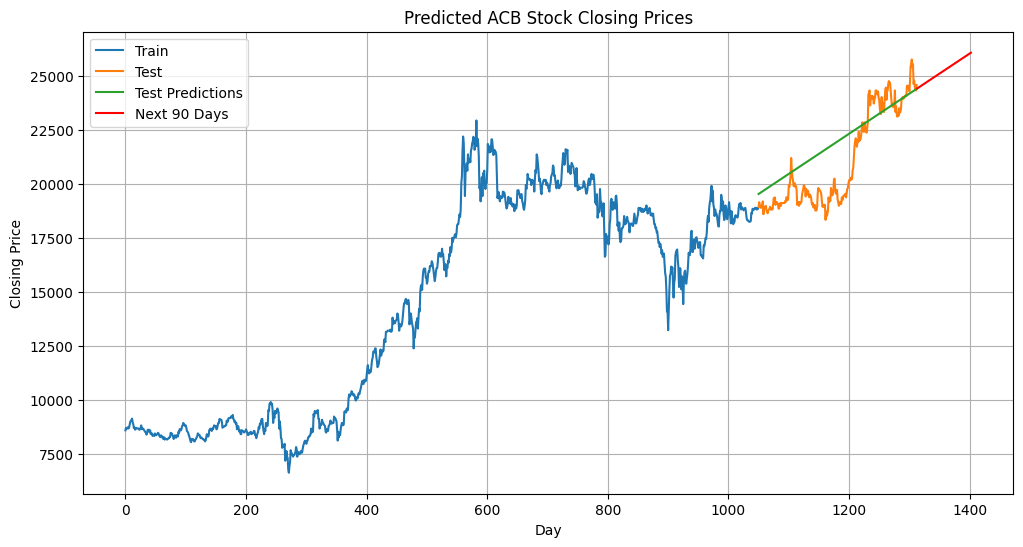

In [34]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 7:3

In [51]:
# Split data into train and test sets
train_size = int(len(df) * 0.7)
train_data, test_data = df[:train_size], df[train_size:]

In [52]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [54]:
# Define the model
def build_model(input_dim):
    model = Sequential()
    # Using a smaller standard deviation for the normal initializer
    model.add(Dense(1, input_dim=input_dim, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), activation='linear'))
    # Increased learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = build_model(input_dim=1)
model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=5)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())

# Output the model summary to check the structure
print('---------Model summary----------')
model.summary()
model.get_weights()

13/13 [==============================] - 0s 2ms/step
Predictions: [15230.645  15247.199  15263.753  15280.308  15296.861  15313.415
 15329.97   15346.523  15363.077  15379.632  15396.186  15412.739
 15429.294  15445.848  15462.401  15478.956  15495.51   15512.063
 15528.618  15545.172  15561.726  15578.28   15594.834  15611.388
 15627.942  15644.496  15661.051  15677.6045 15694.158  15710.713
 15727.267  15743.82   15760.375  15776.929  15793.482  15810.037
 15826.591  15843.145  15859.699  15876.253  15892.807  15909.361
 15925.915  15942.469  15959.023  15975.577  15992.131  16008.686
 16025.239  16041.794  16058.348  16074.901  16091.456  16108.01
 16124.563  16141.118  16157.672  16174.226  16190.78   16207.334
 16223.888  16240.442  16256.996  16273.55   16290.1045 16306.658
 16323.212  16339.767  16356.32   16372.874  16389.428  16405.982
 16422.537  16439.09   16455.645  16472.2    16488.752  16505.307
 16521.861  16538.414  16554.969  16571.523  16588.078  16604.63
 16621.186  

[array([[16.55405]], dtype=float32), array([17.472504], dtype=float32)]

In [55]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



3/3 [==============================] - 0s 4ms/step


In [56]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.079
MAE: 1645.276
RMSE: 1940.258
MSLE: 0.009
-------------------


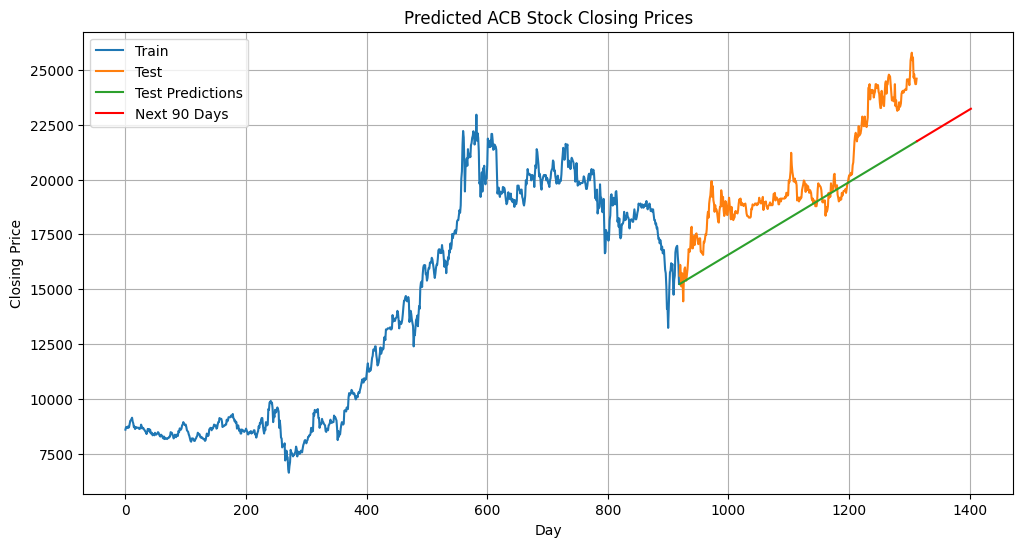

In [57]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 9:1

In [60]:
# Split data into train and test sets
train_size = int(len(df) * 0.9)
train_data, test_data = df[:train_size], df[train_size:]

In [61]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [63]:
# Define the model
def build_model(input_dim):
    model = Sequential()
    # Using a smaller standard deviation for the normal initializer
    model.add(Dense(1, input_dim=input_dim, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), activation='linear'))
    # Increased learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = build_model(input_dim=1)
model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=5)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())

# Output the model summary to check the structure
print('---------Model summary----------')
model.summary()
model.get_weights()

5/5 [==============================] - 0s 3ms/step
Predictions: [23952.078 23972.342 23992.604 24012.867 24033.129 24053.393 24073.654
 24093.918 24114.182 24134.443 24154.707 24174.969 24195.232 24215.494
 24235.758 24256.02  24276.283 24296.545 24316.809 24337.072 24357.334
 24377.598 24397.86  24418.123 24438.385 24458.648 24478.91  24499.174
 24519.438 24539.7   24559.963 24580.225 24600.488 24620.75  24641.014
 24661.275 24681.54  24701.8   24722.064 24742.328 24762.59  24782.854
 24803.115 24823.379 24843.64  24863.904 24884.166 24904.43  24924.693
 24944.955 24965.219 24985.48  25005.744 25026.006 25046.27  25066.531
 25086.795 25107.057 25127.32  25147.584 25167.846 25188.11  25208.371
 25228.635 25248.896 25269.16  25289.422 25309.686 25329.947 25350.21
 25370.475 25390.736 25411.    25431.262 25451.525 25471.787 25492.05
 25512.312 25532.576 25552.84  25573.102 25593.365 25613.627 25633.89
 25654.152 25674.416 25694.678 25714.941 25735.203 25755.467 25775.73
 25795.992 25816.

[array([[20.26279]], dtype=float32), array([21.721952], dtype=float32)]

In [64]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



3/3 [==============================] - 0s 3ms/step


In [65]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.111
MAE: 2410.797
RMSE: 2705.057
MSLE: 0.014
-------------------


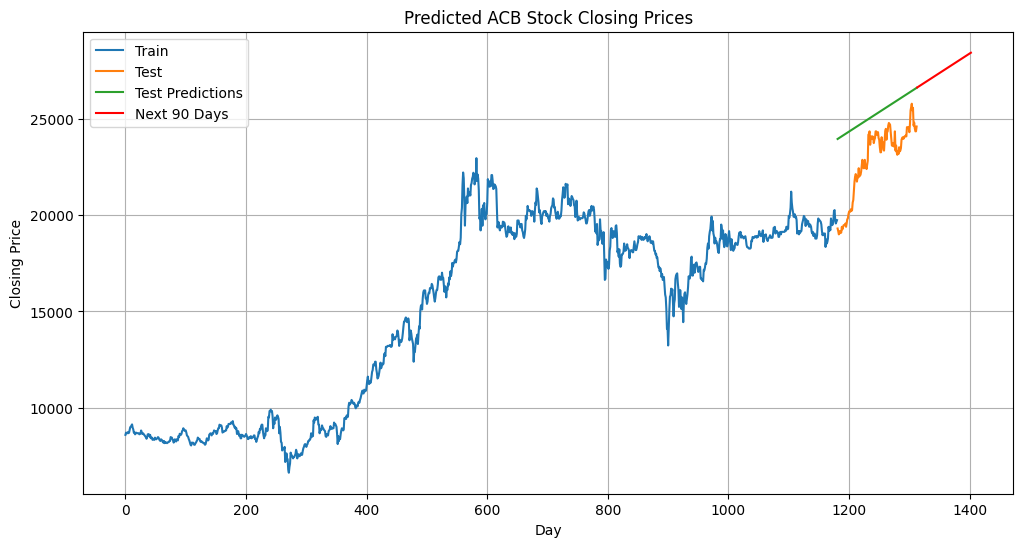

In [66]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()